In [1]:
import ee

ee.Initialize()

In [2]:
today = date.today()

# dd/mm/YY
d1 = today.strftime("%d/%m/%Y")
print("d1 =", d1)

print(ee.Image("NASA/NASADEM_HGT/001").get("title").getInfo())

NASADEM: NASA NASADEM Digital Elevation 30m


In [47]:
import io
import requests
import numpy

region = ee.Geometry.Polygon(
    [
        [
            [-103.1913812014911,20.33034573665963],
            [-103.1922818923659,20.32761306717687],
            [-103.1880223393225,20.32661425447412],
            [-103.1883963909232,20.33111088627422],
            [-103.1913812014911,20.33034573665963]
        ]
    ],
    None,
    False
)

col_filter = ee.Filter([ee.Filter.bounds(region), ee.Filter.date('2021-04-02', '2021-04-03')]);

dwCol = ee.ImageCollection('GOOGLE/DYNAMICWORLD/V1').filter(col_filter)

array = dwCol.first().toInt8()

url = array.getDownloadURL({
    'bands': ['label'],
    'region': region,
    'scale': 10,
    'format': 'NPY'
})

response = requests.get(url)
print(url)

if response.status_code == 200:
    data = numpy.load(io.BytesIO(response.content))
    
    print(data.shape)

    new_data = []
    for row in data:
        new_row = []
        for item in row:
            new_row.append(item[0])
        new_data.append(new_row)

    data = numpy.array(new_data)
else:
    print("nu")

https://earthengine.googleapis.com/v1alpha/projects/earthengine-legacy/thumbnails/fcd1d12d4ca8885b7facc561dcb9e62a-0a8313799697514dc926add0de33091a:getPixels
(51, 46)


In [48]:
print(data)

[[6 6 6 ... 6 6 6]
 [6 6 6 ... 6 6 6]
 [6 6 6 ... 6 6 6]
 ...
 [5 5 5 ... 5 5 5]
 [5 5 5 ... 5 5 5]
 [5 5 5 ... 5 5 5]]


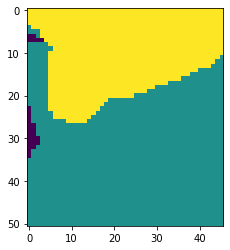

In [49]:
import matplotlib.pyplot as plt

plt.imshow(data)

In [8]:
import geemap

img = array.getArray('water')

geemap.ee_to_numpy(img)


<class 'ee.Array'>


In [38]:
last

TypeError: Image data of dtype object cannot be converted to float

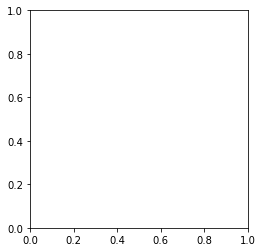

In [36]:
import matplotlib.pyplot as plt
plt.imshow(img.toList())